# EE5907 Programming Assignment Q2
Lee Jianwei
A0018867

In [59]:
from __future__ import division
import scipy.io
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
np.set_printoptions(precision=2, suppress=True)

# Data Processing

### Load

In [2]:
d = scipy.io.loadmat('spamData.mat')
ytest = d['ytest'].flatten()
ytrain = d['ytrain'].flatten()
xtest = d['Xtest']
xtrain = d['Xtrain']

In [18]:
#z-normalise features
def znorm1D(array1D):
    m = np.mean(array1D)
    s = np.std(array1D)
    return np.array((array1D-m)/s)
def znorm2D(array2D):
    """znorm along columns of 2D array"""
    znormed_columns = np.array([znorm1D(c) for c in array2D.T]) # each column in array2D is a row (called c) in array2D.T
    return znormed_columns.T
xtrainZ = znorm2D(xtrain)
xtestZ = znorm2D(xtest)

In [56]:
# test znorm works:
print np.mean(xtrainZ.T), np.std(xtrainZ.T)

5.89729525115e-19 1.0


In [164]:
#log-transform features
def log2D(array):
    """array: list of emails, each 57 features long"""
    return np.array([np.log(x+0.1) for x in array]).astype('uint8') #x is a 57 element array
xtrainLog_ = log2D(xtrain)
xtestLog_ = log2D(xtest)

# Z-norm

## MLE from training Data

In [26]:
classMLE = np.average(ytrain)

In [60]:
# training data feature MLE
xtrainZ_mean_spam = np.mean(xtrainZ[ytrain==1])
xtrainZ_sigma_spam = np.std(xtrainZ[ytrain==1])
xtrainZ_mean_notspam = np.mean(xtrainZ[ytrain==0])
xtrainZ_sigma_notspam = np.std(xtrainZ[ytrain==0])

In [109]:
 def classifyZ(email):
    """
    BASED ON MLE
    classifies each email according to a gaussian likelihood, 
    parameterised by the plug-in estimate, which is the training data feature MLE 
    :params email: 57-element binarised array
    """
    N_features = len(email)
    
    SecondTerm_Spam = 0
    SecondTerm_notSpam = 0
    
    for j in np.arange(N_features):

        SecondTerm_Spam += np.log(norm.pdf(email[j],
                                  xtrainZ_mean_spam,
                                  xtrainZ_sigma_spam))

        SecondTerm_notSpam += np.log(norm.pdf(email[j],
                                     xtrainZ_mean_notspam,
                                     xtrainZ_sigma_notspam))
    
    LogProb_Spam = np.log(classMLE) + SecondTerm_Spam
    
    LogProb_notSpam = np.log(1-classMLE) + SecondTerm_notSpam
    
    class_ = (LogProb_Spam >= LogProb_notSpam).astype('uint8')
    return class_

In [135]:
def error_rate_Z(emails,categories):
    N_errors = 0
    
    for idx,mail in enumerate(emails):
            N_errors += np.logical_xor(classifyZ(mail), categories[idx])        

    return N_errors/len(emails)

In [131]:
error_rates_training_Z = error_rate_Z(xtrainZ, ytrain)

3065


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log


In [132]:
error_rates_training_Z

0.51321370309951064

In [128]:
error_rates_test_Z = error_rate_Z(xtestZ, ytest)

1536


In [130]:
error_rates_test_Z

0.52018229166666663

## Log-Transform

In [166]:
# training data feature MLE
xtrainLog_mean_spam = np.mean(xtrainLog[ytrain==1])
xtrainLog_sigma_spam = np.std(xtrainLog[ytrain==1])
xtrainLog_mean_notspam = np.mean(xtrainLog[ytrain==0])
xtrainLog_sigma_notspam = np.std(xtrainLog[ytrain==0])

In [167]:
 def classifyLog(email):
    """
    BASED ON MLE
    classifies each email according to a gaussian likelihood, 
    parameterised by the plug-in estimate, which is the training data feature MLE 
    :params email: 57-element binarised array
    """
    N_features = len(email)
    
    SecondTerm_Spam = 0
    SecondTerm_notSpam = 0
    
    for j in np.arange(N_features):

        SecondTerm_Spam += np.log(norm.pdf(email[j],
                                  xtrainLog_mean_spam,
                                  xtrainLog_sigma_spam))

        SecondTerm_notSpam += np.log(norm.pdf(email[j],
                                     xtrainLog_mean_notspam,
                                     xtrainLog_sigma_notspam))
    
    LogProb_Spam = np.log(classMLE) + SecondTerm_Spam
    
    LogProb_notSpam = np.log(1-classMLE) + SecondTerm_notSpam
    
    class_ = (LogProb_Spam >= LogProb_notSpam).astype('uint8')
    return class_

In [168]:
def error_rate_Log(emails,categories):
    N_errors = 0
    
    for idx,mail in enumerate(emails):
            N_errors += np.logical_xor(classifyLog(mail), categories[idx])        

    return N_errors/len(emails)

In [169]:
error_rates_training_Log = error_rate_Log(xtrainLog, ytrain)

In [170]:
error_rates_training_Log

0.30734094616639479

In [171]:
error_rates_test_Log = error_rate_Log(xtestLog, ytest)

In [172]:
error_rates_test_Log

0.294921875

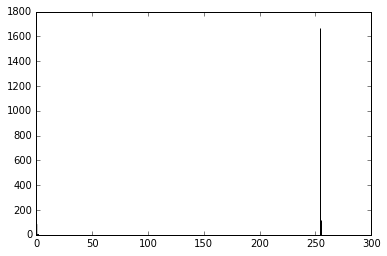

In [183]:
plt.figure()
plt.hist(xtrainLog[:,5][ytrain==0],1000);
plt.show()